<a href="https://colab.research.google.com/github/Eunjung-Cho/Project/blob/master/overwatch-league/%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%83%90%EC%83%89_%EB%B0%8F_%EC%A0%84%EC%B2%98%EB%A6%AC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# match_map_stats.csv
* 원 데이터의 한 행에 대한 key : (match_id, game_number, map_round)
* train_X 는 (match_id, game_number)가 한 행에 대한 key가 되도록 만들어야 함.
* map_wiiner, map_loser는 game_number에 해당하는 승자, 패자임
* 궁금한거 : 공,수 순서는 어떻게정하는거? attacker_time_banked 이거뭐임?

# 데이터 읽기

In [ ]:
df = pd.read_csv('data/match_map_stats.csv')

In [ ]:
df.head(11)

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
0,2018-01-11 00:12:07,2018-01-11 00:20:07,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,1,...,Los Angeles Valiant,San Francisco Shock,75.615051,0.000000,0.000000,240.000000,NaN,NaN,2,0
1,2018-01-11 00:22:05,2018-01-11 00:27:59,Overwatch League - Stage 1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Dorado,2,...,Los Angeles Valiant,San Francisco Shock,75.649597,75.615051,125.750572,0.000000,NaN,NaN,3,2
2,2018-01-11 00:34:39,2018-01-11 00:38:29,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,1,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,250.492004,240.000000,NaN,NaN,2,0
3,2018-01-11 00:40:27,2018-01-11 00:44:41,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,2,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,225.789032,250.492004,NaN,NaN,2,2
4,2018-01-11 00:46:09,2018-01-11 00:49:48,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,36.396057,250.492004,NaN,NaN,4,2
5,2018-01-11 00:51:16,2018-01-11 00:56:55,Overwatch League - Stage 1,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Temple of Anubis,4,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,0.000000,36.396057,NaN,NaN,3,4
6,2018-01-11 01:11:32,2018-01-11 01:16:33,Overwatch League - Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,1,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,0.000000,0.000000,99.0,100.0,0,1
7,2018-01-11 01:17:19,2018-01-11 01:20:09,Overwatch League - Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,2,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,0.000000,0.000000,100.0,0.0,1,1
8,2018-01-11 01:20:55,2018-01-11 01:25:08,Overwatch League - Stage 1,10223,3,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Ilios,3,...,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,0.000000,0.000000,100.0,65.0,2,1
9,2018-01-11 01:32:26,2018-01-11 01:39:37,Overwatch League - Stage 1,10223,4,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,Numbani,1,...,Los Angeles Valiant,San Francisco Shock,75.549507,0.000000,0.000000,0.000000,NaN,NaN,1,0


# 간단한 데이터 탐색

In [ ]:
df[['match_id','game_number','winning_team_final_map_score','losing_team_final_map_score','attacker_round_end_score','defender_round_end_score']].head(10)

,match_id,game_number,winning_team_final_map_score,losing_team_final_map_score,attacker_round_end_score,defender_round_end_score
0,10223,1,3,2,2,0
1,10223,1,3,2,3,2
2,10223,2,4,3,2,0
3,10223,2,4,3,2,2
4,10223,2,4,3,4,2
5,10223,2,4,3,3,4
6,10223,3,2,1,0,1
7,10223,3,2,1,1,1
8,10223,3,2,1,2,1
9,10223,4,2,1,1,0


In [ ]:
df.tail()

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
9102,2020-10-10 14:42:51,2020-10-10 14:47:11,OWL 2020 Regular Season,35552,4,San Francisco Shock,Seoul Dynasty,San Francisco Shock,Watchpoint: Gibraltar,2,...,San Francisco Shock,Seoul Dynasty,73.462471,88.701904,0.0,18.485001,NaN,NaN,0,3
9103,2020-10-10 14:53:49,2020-10-10 14:59:07,OWL 2020 Regular Season,35552,5,San Francisco Shock,San Francisco Shock,Seoul Dynasty,Busan,1,...,Seoul Dynasty,San Francisco Shock,0.000000,0.000000,0.0,0.000000,99.0,100.0,0,1
9104,2020-10-10 14:59:52,2020-10-10 15:05:13,OWL 2020 Regular Season,35552,5,San Francisco Shock,San Francisco Shock,Seoul Dynasty,Busan,2,...,Seoul Dynasty,San Francisco Shock,0.000000,0.000000,0.0,0.000000,99.0,100.0,0,2
9105,2020-10-10 15:21:25,2020-10-10 15:31:23,OWL 2020 Regular Season,35552,6,San Francisco Shock,San Francisco Shock,Seoul Dynasty,Hollywood,1,...,Seoul Dynasty,San Francisco Shock,74.363846,0.000000,0.0,0.000000,NaN,NaN,2,0
9106,2020-10-10 15:32:54,2020-10-10 15:39:45,OWL 2020 Regular Season,35552,6,San Francisco Shock,San Francisco Shock,Seoul Dynasty,Hollywood,2,...,Seoul Dynasty,San Francisco Shock,57.818954,74.363846,0.0,0.000000,NaN,NaN,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9107 entries, 0 to 9106
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   round_start_time              9106 non-null   object 
 1   round_end_time                9107 non-null   object 
 2   stage                         9107 non-null   object 
 3   match_id                      9107 non-null   int64  
 4   game_number                   9107 non-null   int64  
 5   match_winner                  9107 non-null   object 
 6   map_winner                    9107 non-null   object 
 7   map_loser                     9107 non-null   object 
 8   map_name                      9107 non-null   object 
 9   map_round                     9107 non-null   int64  
 10  winning_team_final_map_score  9107 non-null   int64  
 11  losing_team_final_map_score   9107 non-null   int64  
 12  control_round_name            2648 non-null   object 
 13  att

In [ ]:
df.describe()

,match_id,game_number,map_round,winning_team_final_map_score,losing_team_final_map_score,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
count,9107.000000,9107.000000,9107.000000,9107.000000,9107.000000,9107.000000,9107.000000,9107.000000,9107.000000,2647.000000,2647.000000,9107.000000,9107.000000
mean,22377.484682,2.617218,1.908312,2.739870,1.480290,30.175833,19.068720,47.448565,48.510463,77.763506,79.772951,1.821785,1.278467
std,9333.199970,1.259431,0.973650,1.128799,1.316373,40.113113,37.498495,83.481629,91.270267,34.397426,33.087692,1.246288,1.292063
min,10223.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10582.500000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.500000,66.000000,1.000000,0.000000
50%,21348.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,99.000000,100.000000,2.000000,1.000000
75%,32842.000000,4.000000,2.000000,3.000000,2.000000,70.299301,0.000000,67.571529,60.000000,100.000000,100.000000,3.000000,2.000000
max,36231.000000,8.000000,7.000000,8.000000,7.000000,246.755112,900.000000,404.036987,415.794983,101.000000,101.000000,8.000000,8.000000


## 몇 개의 데이터가 있나?

* map_round 9107개의 데이터

In [ ]:
df.shape   # (match_id, game_number, map_round)가 한 행에 대한 key로봤는데 

(9107, 25)

In [ ]:
pd.DataFrame(df[['match_id','game_number','map_round']].value_counts()).shape  # 중복데이터가 존재함

(9100, 1)

In [ ]:
df_keys = list(df[['match_id','game_number','map_round']].apply(tuple,axis=1))

In [ ]:
count = {}
for i in df_keys:
    try: count[i] += 1
    except: count[i]=1

* 중복데이터 알아보기

In [ ]:
dulp = []
for  key, val in count.items():
    if val >1:
        print(key,'번 데이터는',val,'개')
        dulp.append(key)
print('\n','중복 데이터',dulp)

(10280, 3, 1) 번 데이터는 2 개
(10280, 3, 2) 번 데이터는 2 개
(21352, 1, 2) 번 데이터는 2 개
(21433, 3, 1) 번 데이터는 2 개
(21433, 3, 2) 번 데이터는 2 개
(34491, 1, 1) 번 데이터는 2 개
(34746, 3, 4) 번 데이터는 2 개

 중복 데이터 [(10280, 3, 1), (10280, 3, 2), (21352, 1, 2), (21433, 3, 1), (21433, 3, 2), (34491, 1, 1), (34746, 3, 4)]


In [ ]:
mid = df['match_id']==10280
gnum =df['game_number']==3
mr = df['map_round']==1
df[mid & gnum & mr].index

Int64Index([661, 663], dtype='int64')

In [ ]:
rindex = []
for m,g,r in dulp:
    mid = df['match_id']==m
    gnum =df['game_number']==g
    mr = df['map_round']==r
    for i in list(df[mid & gnum & mr].index):
        rindex.append(i)

* 중복 데이터 프린트

In [ ]:
df.iloc[rindex,:]

,round_start_time,round_end_time,stage,match_id,game_number,match_winner,map_winner,map_loser,map_name,map_round,...,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,attacker_round_end_score,defender_round_end_score
661,2018-02-22 05:13:02,2018-02-22 05:17:13,Overwatch League - Stage 2,10280,3,Los Angeles Gladiators,Los Angeles Gladiators,San Francisco Shock,King's Row,1,...,San Francisco Shock,Los Angeles Gladiators,70.293495,0.000000,229.013000,0.000,NaN,NaN,3,0
663,2018-02-22 05:33:20,2018-02-22 05:41:32,Overwatch League - Stage 2,10280,3,Los Angeles Gladiators,Los Angeles Gladiators,San Francisco Shock,Watchpoint: Gibraltar,1,...,San Francisco Shock,Los Angeles Gladiators,83.651459,0.000000,0.000000,240.000,NaN,NaN,2,0
662,2018-02-22 05:19:10,2018-02-22 05:26:04,Overwatch League - Stage 2,10280,3,Los Angeles Gladiators,Los Angeles Gladiators,San Francisco Shock,King's Row,2,...,San Francisco Shock,Los Angeles Gladiators,104.270859,70.293495,0.000000,229.013,NaN,NaN,1,3
664,2018-02-22 05:43:30,2018-02-22 05:50:00,Overwatch League - Stage 2,10280,3,Los Angeles Gladiators,Los Angeles Gladiators,San Francisco Shock,Watchpoint: Gibraltar,2,...,San Francisco Shock,Los Angeles Gladiators,75.560165,83.651459,0.000000,0.000,NaN,NaN,1,2
4065,2019-04-27 16:55:38,2019-04-27 16:58:57,Overwatch League Stage 2,21352,1,London Spitfire,London Spitfire,Paris Eternal,Busan,2,...,Paris Eternal,London Spitfire,0.000000,0.000000,0.000000,0.000,36.0,100.0,0,2
4066,2019-04-27 16:37:19,2019-04-27 16:58:57,Overwatch League Stage 2,21352,1,London Spitfire,London Spitfire,Paris Eternal,Busan,2,...,Paris Eternal,London Spitfire,0.000000,0.000000,0.000000,0.000,36.0,100.0,0,2
5361,2019-07-28 19:50:17,2019-07-28 19:54:40,Overwatch League Stage 4,21433,3,Shanghai Dragons,Seoul Dynasty,Shanghai Dragons,Hollywood,1,...,Seoul Dynasty,Shanghai Dragons,0.000000,0.000000,0.000000,0.000,NaN,NaN,0,0
5363,2019-07-28 20:06:32,2019-07-28 20:14:46,Overwatch League Stage 4,21433,3,Shanghai Dragons,Shanghai Dragons,Seoul Dynasty,Junkertown,1,...,Seoul Dynasty,Shanghai Dragons,101.897583,0.000000,0.000000,0.000,NaN,NaN,3,0
5362,2019-07-28 19:57:53,2019-07-28 19:59:01,Overwatch League Stage 4,21433,3,Shanghai Dragons,Seoul Dynasty,Shanghai Dragons,Hollywood,2,...,Seoul Dynasty,Shanghai Dragons,0.000000,0.000000,171.990005,0.000,NaN,NaN,1,0
5364,2019-07-28 20:16:27,2019-07-28 20:23:15,Overwatch League Stage 4,21433,3,Shanghai Dragons,Shanghai Dragons,Seoul Dynasty,Junkertown,2,...,Seoul Dynasty,Shanghai Dragons,74.707176,101.897583,0.000000,0.000,NaN,NaN,1,3


* 3629개의 game 데이터 

In [ ]:
pd.DataFrame(df[['match_id','game_number']].value_counts()).shape  # (match_id, game_number)가 한 game에 대한 key

(3629, 1)

## match당 몇판의 게임을 했을까?

2    2316
3    2288
1    2139
4    1740
5     536
6      59
7      26
8       3
Name: game_number, dtype: int64


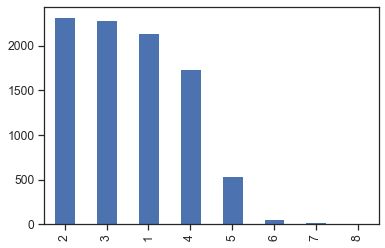

In [ ]:
print(df['game_number'].value_counts())
df['game_number'].value_counts().plot.bar()

* 평균 1 match 당 2.6회의 game이 이루어진다.

In [ ]:
df['game_number'].mean()

2.617217524980784

## map_round는 몇 번 정도 돌아갈까?

In [ ]:
df['map_round'].value_counts()

1    3632
2    3570
3    1194
4     589
5      71
6      43
7       8
Name: map_round, dtype: int64

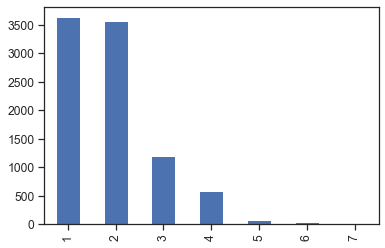

In [ ]:
df['map_round'].value_counts().plot.bar()

## round_end_score ? 

2    2638
1    2294
3    1949
0    1491
4     550
5     143
6      37
7       3
8       2
Name: attacker_round_end_score, dtype: int64


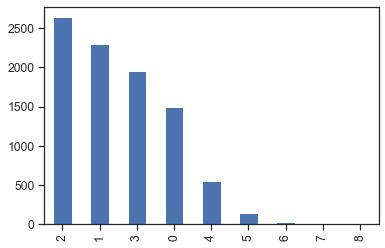

In [ ]:
print(df['attacker_round_end_score'].value_counts())
df['attacker_round_end_score'].value_counts().plot.bar()

0    3664
2    1986
1    1594
3    1514
4     250
5      62
6      35
7       1
8       1
Name: defender_round_end_score, dtype: int64


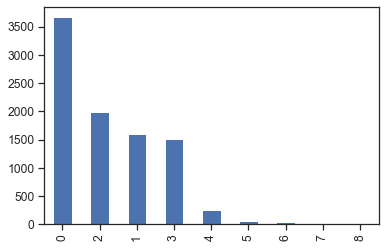

In [ ]:
print(df['defender_round_end_score'].value_counts())
df['defender_round_end_score'].value_counts().plot.bar()

## final_map_score?

2    4069
3    2402
4    1220
1     644
5     567
6     184
8      12
7       7
0       2
Name: winning_team_final_map_score, dtype: int64


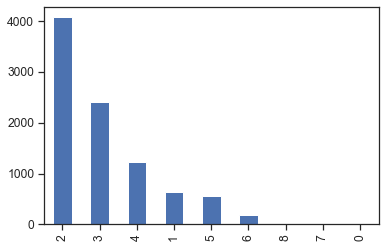

In [ ]:
print(df['winning_team_final_map_score'].value_counts())
df['winning_team_final_map_score'].value_counts().plot.bar()

1    2773
0    2503
2    1750
3    1312
4     604
5     146
7      12
6       7
Name: losing_team_final_map_score, dtype: int64


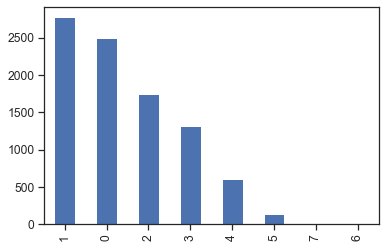

In [ ]:
print(df['losing_team_final_map_score'].value_counts())
df['losing_team_final_map_score'].value_counts().plot.bar()

# 전처리

* 년 정보는 삭제. 시간 정보만 남기기 (나중에 필요할지도 모르나, 일단은 )

In [ ]:
df['round_start_time'] = pd.to_datetime(df['round_start_time'],format='%Y-%m-%d %H:%M:%S',errors='raise')
df['round_end_time'] = pd.to_datetime(df['round_end_time'],format='%Y-%m-%d %H:%M:%S',errors='raise')

In [ ]:
df['time'] =  df['round_end_time'] - df['round_start_time']

In [ ]:
df['time'].head()

0   0 days 00:08:00
1   0 days 00:05:54
2   0 days 00:03:50
3   0 days 00:04:14
4   0 days 00:03:39
Name: time, dtype: timedelta64[ns]

* 1 map_round 당 평균 게임 시간 5분. 최대 28분. 최소 23초

In [ ]:
df['time'].describe()

count                         9106
mean     0 days 00:05:00.595761036
std      0 days 00:02:14.631964008
min                0 days 00:00:23
25%                0 days 00:03:26
50%                0 days 00:04:41
75%                0 days 00:06:45
max                0 days 00:28:52
Name: time, dtype: object

In [ ]:
df['time'] = df['time'].astype('timedelta64[s]')/60 #소수점으로 변환

In [ ]:
df['time'].head()

0    8.000000
1    5.900000
2    3.833333
3    4.233333
4    3.650000
Name: time, dtype: float64

* 경기 시간 히스토그램 (분 단위)

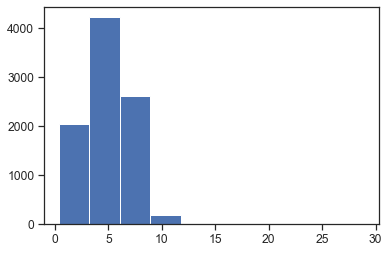

In [ ]:
plt.hist(df['time'])
plt.show()

### 열 삭제
* 'round_start_time', 'round_end_time', 'stage','control_round_name'

* 'winning_team_final_map_score','losing_team_final_map_score','attacker_round_end_score', 'defender_round_end_score' 이건 너무 결정적인 변수이므로 삭제함

In [ ]:
df = df.drop(['round_start_time', 'round_end_time', 'stage','control_round_name',
              'winning_team_final_map_score','losing_team_final_map_score','attacker_round_end_score', 
              'defender_round_end_score'],axis=1)

In [ ]:
df = df.drop(['map_name'],axis=1)

In [ ]:
df.head()

,match_id,game_number,match_winner,map_winner,map_loser,map_round,attacker,defender,team_one_name,team_two_name,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,time
0,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,1,San Francisco Shock,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,75.615051,0.000000,0.000000,240.000000,NaN,NaN,8.000000
1,10223,1,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,2,Los Angeles Valiant,San Francisco Shock,Los Angeles Valiant,San Francisco Shock,75.649597,75.615051,125.750572,0.000000,NaN,NaN,5.900000
2,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,1,San Francisco Shock,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,250.492004,240.000000,NaN,NaN,3.833333
3,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,2,Los Angeles Valiant,San Francisco Shock,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,225.789032,250.492004,NaN,NaN,4.233333
4,10223,2,Los Angeles Valiant,Los Angeles Valiant,San Francisco Shock,3,Los Angeles Valiant,San Francisco Shock,Los Angeles Valiant,San Francisco Shock,0.000000,0.000000,36.396057,250.492004,NaN,NaN,3.650000


## 변수들 간의 상관관계 알아보기

In [ ]:
df.corr()

,match_id,game_number,map_round,attacker_payload_distance,defender_payload_distance,attacker_time_banked,defender_time_banked,attacker_control_perecent,defender_control_perecent,time
match_id,1.000000,-0.003946,0.000506,-0.025829,-0.005838,-0.020456,-0.186301,-0.016610,0.025332,-0.047469
game_number,-0.003946,1.000000,-0.014743,0.295712,0.194615,-0.003185,0.002467,0.019571,0.002826,0.101206
map_round,0.000506,-0.014743,1.000000,-0.188482,0.239142,-0.058189,0.081513,-0.014697,0.004824,-0.442296
attacker_payload_distance,-0.025829,0.295712,-0.188482,1.000000,0.486470,0.035791,0.003424,NaN,NaN,0.449347
defender_payload_distance,-0.005838,0.194615,0.239142,0.486470,1.000000,-0.013195,0.074711,NaN,NaN,0.093040
attacker_time_banked,-0.020456,-0.003185,-0.058189,0.035791,-0.013195,1.000000,0.048977,NaN,NaN,-0.282405
defender_time_banked,-0.186301,0.002467,0.081513,0.003424,0.074711,0.048977,1.000000,NaN,NaN,0.063245
attacker_control_perecent,-0.016610,0.019571,-0.014697,NaN,NaN,NaN,NaN,1.000000,-0.395528,0.442963
defender_control_perecent,0.025332,0.002826,0.004824,NaN,NaN,NaN,NaN,-0.395528,1.000000,0.397585
time,-0.047469,0.101206,-0.442296,0.449347,0.093040,-0.282405,0.063245,0.442963,0.397585,1.000000


* 산점도 행렬

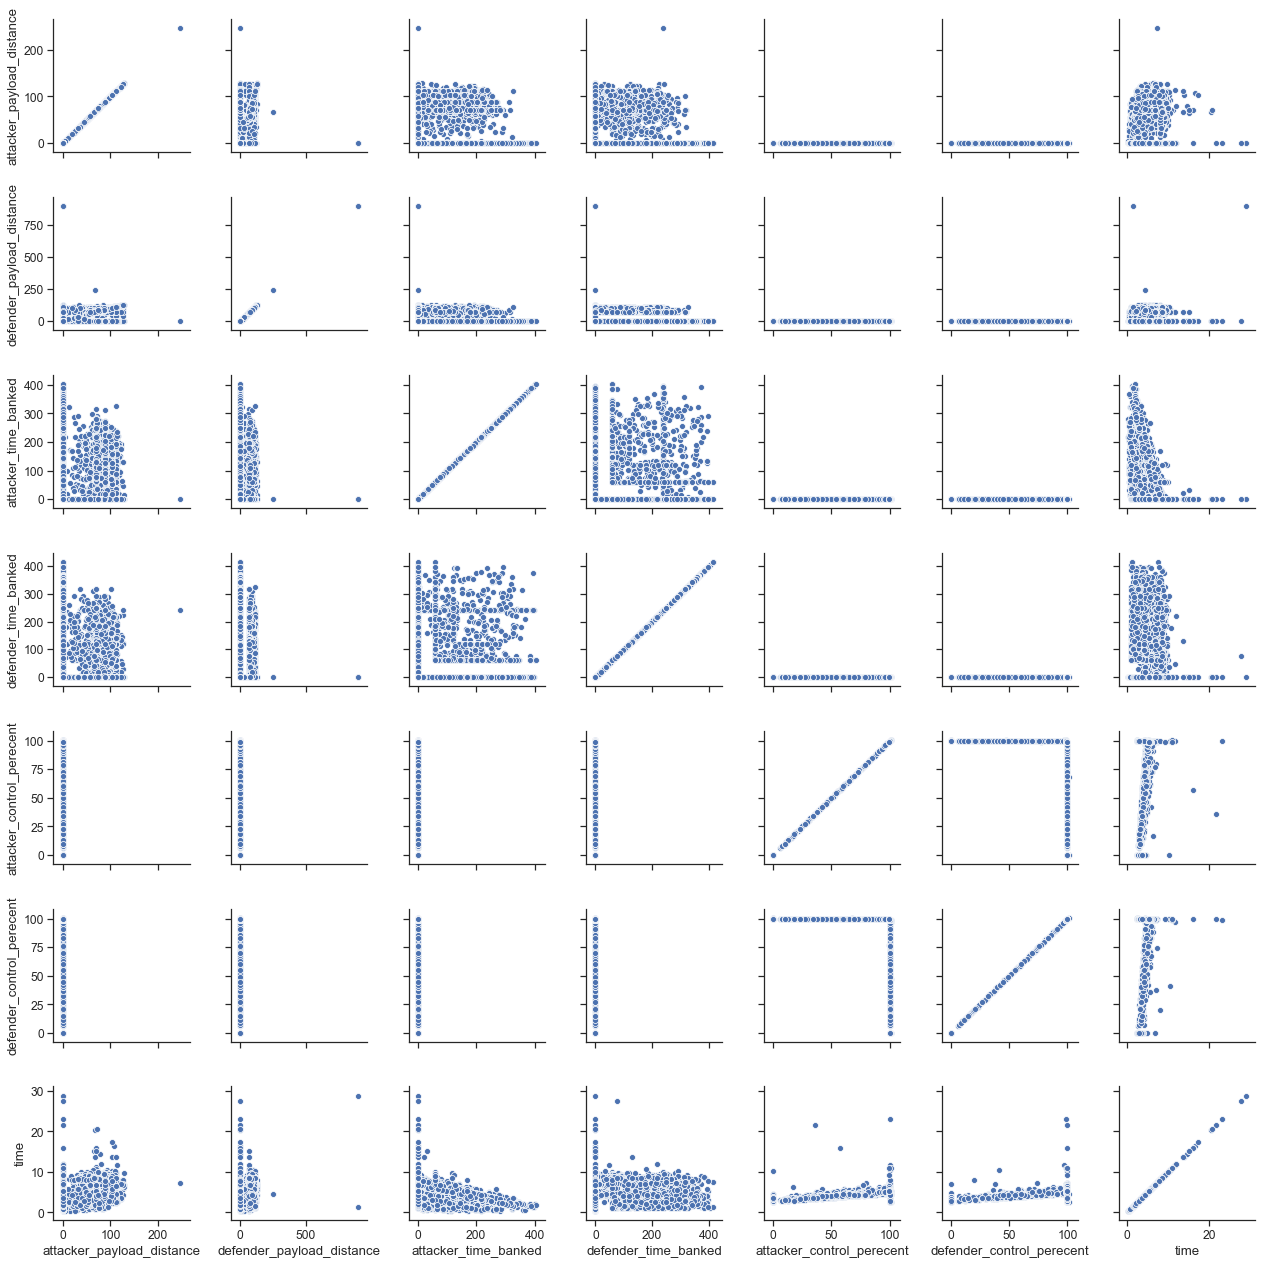

In [ ]:
sns.set(font_scale=1.1) ## 폰트사이즈 조절
sns.set_style('ticks') ## 축 눈금 표시
data = df[['attacker_payload_distance',
       'defender_payload_distance', 'attacker_time_banked',
       'defender_time_banked', 'attacker_control_perecent',
       'defender_control_perecent', 'time']]
sns.pairplot(data,
             diag_kind=None)
plt.show()

## score점수 시간별로 정규화 하는 하는 함수 정의

* columns에 있는 것들이 시간에 따라서 달라지지않는거라면 정규화 x 
(몰라서 일단 다 이렇게함)

In [ ]:
columns = ['attacker_payload_distance',
       'defender_payload_distance', 'attacker_time_banked',
       'defender_time_banked', 'attacker_control_perecent',
       'defender_control_perecent']  # 정규화할 칼럼 리스트
def scaler(df,columns):
    for col in columns:
        df[col] = df[col]/df['time']

In [ ]:
# scaler(df,columns)

# 팀 별로 데이터 변환하기

##### 만든 변수
* map_winner : 이긴 팀 이름
* team_one_name : team1이름
* team_two_name : team2 이름
* team_one's attacker_payload_distance
* team_two's attacker_payload_distance
* team_one's defender_payload_distance 
* team_two's defender_payload_distance
* team_one's attacker_time_banked 
* team_two's attacker_time_banked
* team_one's defender_time_banked 
* team_two's defender_time_banked
* team_one's attacker_control_perecent 
* team_two's defender_control_perecent
* key : (match_id, game_number)

## key 만들기
* key : 'match_id','game_number'

In [ ]:
df1 = df.drop(['time'],axis=1)  # 시간 삭제

In [ ]:
df1 = df1.fillna(0)

In [ ]:
df1['key'] = [tuple([df.loc[r,'match_id'],df.loc[r,'game_number']]) for r in range(len(df))]

In [ ]:
df1['key'].value_counts().shape[0]

3629

In [ ]:
df[df['map_round']==1].shape

(3632, 17)

* 변수만들기

In [ ]:
df2 = pd.DataFrame(index=range(0,len(df[df['map_round']==1])), columns=['key','map_winner',
                                                                        'attacker_payload_distance1','attacker_payload_distance2',
                                                                       'defender_payload_distance1','defender_payload_distance2',
                                                                       'attacker_time_banked1','attacker_time_banked2',
                                                                       'defender_time_banked1','defender_time_banked2',
                                                                       'attacker_control_perecent1','attacker_control_perecent2',
                                                                       'defender_control_perecent1','defender_control_perecent2'])

df2['key'] = [df1.loc[r,'key'] for r in range(len(df1)) if df1.loc[r,'map_round'] == 1]
df2['map_winner'] = [df1.loc[r,'map_winner'] for r in range(len(df1)) if df1.loc[r,'map_round'] == 1]
df2['team_one_name'] =  [df1.loc[r,'team_one_name'] for r in range(len(df1)) if df1.loc[r,'map_round'] == 1]
df2['team_two_name'] =  [df1.loc[r,'team_two_name'] for r in range(len(df1)) if df1.loc[r,'map_round'] == 1]



In [ ]:
df2 =df2.fillna(0)

In [ ]:
for i, mg in enumerate(df2['key']):
    m,g = mg
    #print(m,g)
    mid = df['match_id']== m
    gnum =df['game_number']==g
    
    df3 = df1[mid & gnum]
    #print(df3)
    for r in df3.index:
        if df3.loc[r,'attacker'] == df3.loc[r,'team_one_name']:
            df2.loc[i,'attacker_payload_distance1'] += df3.loc[r,'attacker_payload_distance']
            df2.loc[i,'defender_payload_distance2'] += df3.loc[r,'defender_payload_distance']
            df2.loc[i,'attacker_time_banked1'] += df3.loc[r,'attacker_time_banked']
            df2.loc[i,'defender_time_banked2'] += df3.loc[r,'defender_time_banked']
            df2.loc[i,'attacker_control_perecent1'] += df3.loc[r,'attacker_control_perecent']
            df2.loc[i,'defender_control_perecent2'] += df3.loc[r,'defender_control_perecent']
        else:
            df2.loc[i,'attacker_payload_distance2'] += df3.loc[r,'attacker_payload_distance']
            df2.loc[i,'defender_payload_distance1'] += df3.loc[r,'defender_payload_distance']
            df2.loc[i,'attacker_time_banked2'] += df3.loc[r,'attacker_time_banked']
            df2.loc[i,'defender_time_banked1'] += df3.loc[r,'defender_time_banked']
            df2.loc[i,'attacker_control_perecent2'] += df3.loc[r,'attacker_control_perecent']
            df2.loc[i,'defender_control_perecent1'] += df3.loc[r,'defender_control_perecent']



* 완성된 df2

In [ ]:
df2.head()

,key,map_winner,attacker_payload_distance1,attacker_payload_distance2,defender_payload_distance1,defender_payload_distance2,attacker_time_banked1,attacker_time_banked2,defender_time_banked1,defender_time_banked2,attacker_control_perecent1,attacker_control_perecent2,defender_control_perecent1,defender_control_perecent2,team_one_name,team_two_name
0,"(10223, 1)",Los Angeles Valiant,75.649597,75.615051,0.0,75.615051,125.750572,0.000000,240.000000,0.000000,0.0,0.0,0.0,0.0,Los Angeles Valiant,San Francisco Shock
1,"(10223, 2)",Los Angeles Valiant,0.000000,0.000000,0.0,0.000000,262.185089,250.492004,276.396057,500.984009,0.0,0.0,0.0,0.0,Los Angeles Valiant,San Francisco Shock
2,"(10223, 3)",Los Angeles Valiant,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,299.0,0.0,0.0,165.0,Los Angeles Valiant,San Francisco Shock
3,"(10223, 4)",Los Angeles Valiant,75.563667,75.549507,0.0,75.549507,165.840027,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,Los Angeles Valiant,San Francisco Shock
4,"(10224, 1)",Los Angeles Gladiators,70.178932,70.161865,0.0,70.161865,186.312805,0.000000,240.000000,0.000000,0.0,0.0,0.0,0.0,Los Angeles Gladiators,Shanghai Dragons


In [ ]:
df2.shape

(3632, 16)

In [ ]:
df2.tail()

,key,map_winner,attacker_payload_distance1,attacker_payload_distance2,defender_payload_distance1,defender_payload_distance2,attacker_time_banked1,attacker_time_banked2,defender_time_banked1,defender_time_banked2,attacker_control_perecent1,attacker_control_perecent2,defender_control_perecent1,defender_control_perecent2,team_one_name,team_two_name
3627,"(35552, 2)",San Francisco Shock,66.255028,70.296135,0.0,70.296135,0.0,77.557999,0.0,77.557999,0.0,0.0,0.0,0.0,Seoul Dynasty,San Francisco Shock
3628,"(35552, 3)",Seoul Dynasty,0.000000,0.000000,0.0,0.000000,0.0,11.083038,0.0,11.083038,0.0,0.0,0.0,0.0,San Francisco Shock,Seoul Dynasty
3629,"(35552, 4)",Seoul Dynasty,73.462471,88.701904,0.0,88.701904,0.0,18.485001,0.0,18.485001,0.0,0.0,0.0,0.0,San Francisco Shock,Seoul Dynasty
3630,"(35552, 5)",San Francisco Shock,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,198.0,0.0,0.0,200.0,Seoul Dynasty,San Francisco Shock
3631,"(35552, 6)",San Francisco Shock,57.818954,74.363846,0.0,74.363846,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Seoul Dynasty,San Francisco Shock


In [ ]:
#df2.to_csv('data/team12_data.csv',index=False)

# train_data 만들기

#### X_train
* diff_att_pdistance : team_one's attacker_payload_distance - team_two's attacker_payload_distance
* diff_def_pdistance : team_one's defender_payload_distance -  team_two's defender_payload_distance
* diff_att_time_b : team_one's attacker_time_banked - team_two's attacker_time_banked
* diff_def_time_b : team_one's defender_time_banked - team_two's defender_time_banked
* diff_att_control_p : team_one's attacker_control_perecent - team_two's attacker_control_perecent
* diff_def_control_p : team_one's defender_control_perecent - team_two's defender_control_perecent
#### y
* result : team one이 우승하면 1 team two가 우승하면 2

데이터셋_구축하기.ipynb 에 작성